## Определяем мошеннические операции

Датасет: [Credit Card Fraud Detection]( https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [ ]:
!pip install scikit-learn -q
!pip install statsmodels -q
!pip install seaborn -q

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,confusion_matrix, f1_score

In [ ]:
df = pd.read_csv('creditcard.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Нормальных: 284315, (0.9983 %), мошеннических: 492, (0.0017 %)


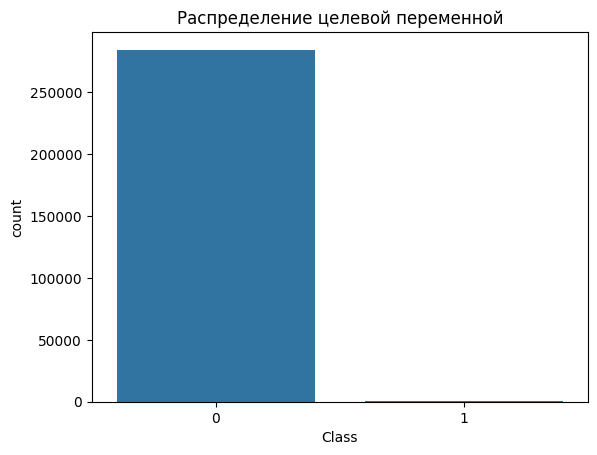

In [ ]:
print(f"Нормальных: {len(df[df['Class']==0])}, ({len(df[df['Class']==0])/df.shape[0]:.4f} %), мошеннических: {len(df[df['Class']==1])}, ({len(df[df['Class']==1])/df.shape[0]:.4f} %)")
sns.countplot(data=df, x='Class')
plt.title('Распределение целевой переменной')
plt.show()

In [ ]:
y = df['Class']
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

format=StandardScaler()
X_train[['Time', 'Amount']]=format.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']]=format.transform(X_test[['Time', 'Amount']])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

log_reg=LogisticRegression()
log_reg.fit(X_train, y_train)

knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
dt_cl=DecisionTreeClassifier()
dt_cl.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier

bagging=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1)
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1)

In [ ]:
rf=RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
sc= StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42, n_jobs=-1)),
        ('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier(random_state=42))
    ],
    n_jobs=-1 , final_estimator=LogisticRegression(random_state=42, n_jobs=-1))
sc.fit(X_train, y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(n_jobs=-1, random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier(random_state=42))],
                   final_estimator=LogisticRegression(n_jobs=-1,
                                                      random_state=42),
                   n_jobs=-1)

In [ ]:
def class_metrics(model, X_test, y_test):
  y_pred=model.predict(X_test)
  y_pred_proba=model.predict_proba(X_test)[:, 1]
  model_metrics = pd.DataFrame([{
      'model' : model,
      'precision' : precision_score(y_test, y_pred),
      'recall' : recall_score(y_test, y_pred),
      'f1_score' : f1_score(y_test, y_pred),
      'roc-auc' : roc_auc_score(y_test, y_pred_proba),
      'conf_ matr' : confusion_matrix(y_test, y_pred)
  }])
  return model_metrics


In [ ]:
log_reg_metr=class_metrics(log_reg, X_test, y_test)
print(log_reg_metr.to_string(index=False))

knn_metr=class_metrics(knn, X_test, y_test)
print(knn_metr.to_string(index=False))

               model  precision   recall  f1_score  roc-auc              conf_ matr
LogisticRegression()   0.828947 0.642857  0.724138 0.955898 [[56851, 13], [35, 63]]
                 model  precision   recall  f1_score  roc-auc             conf_ matr
KNeighborsClassifier()   0.918605 0.806122  0.858696 0.943756 [[56857, 7], [19, 79]]


In [ ]:
dt_metr=class_metrics(dt_cl, X_test, y_test)
print(dt_metr.to_string(index=False))

                   model  precision  recall  f1_score  roc-auc              conf_ matr
DecisionTreeClassifier()    0.72449 0.72449   0.72449 0.862007 [[56837, 27], [27, 71]]


In [ ]:
bagg_metr=class_metrics(bagging, X_test, y_test)
print(bagg_metr.to_string(index=False))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   model  precision   recall  f1_score  roc-auc             conf_ matr
(DecisionTreeClassifier(random_state=685254540), DecisionTreeClassifier(random_state=1365915535), DecisionTreeClassifier(random_state=1278894313), DecisionTreeClassifier(random_state=1641601820), DecisionTreeClassifier(random_state=1730826753), DecisionTreeClassifier(random_state=599400794), DecisionTreeClassifier(random_state=1157491582), DecisionTreeClassifier(random_state=1642281843), DecisionTreeClassifier(random_state=1857243686), DecisionT

In [ ]:
rf_metr=class_metrics(rf, X_test, y_test)
print(rf_metr.to_string(index=False))

In [ ]:
sc_metr=class_metrics(sc, X_test, y_test)
print(sc_metr.to_string(index=False))

                                                                                                                                                                                                                                                                                                                                                                                                                                               model  precision   recall  f1_score  roc-auc             conf_ matr
StackingClassifier(estimators=[('lr',\n                                LogisticRegression(n_jobs=-1, random_state=42)),\n                               ('knn', KNeighborsClassifier()),\n                               ('dt', DecisionTreeClassifier(random_state=42))],\n                   final_estimator=LogisticRegression(n_jobs=-1,\n                                                      random_state=42),\n                   n_jobs=-1)      0.925 0.755102  0.831461 0.959602 [[56858, 6], [24, 74]]


In [ ]:
pd.concat([log_reg_metr, knn_metr, dt_metr, bagg_metr, rf_metr, sc_metr], axis=0)

,model,precision,recall,f1_score,roc-auc,conf_ matr
0,LogisticRegression(),0.828947,0.642857,0.724138,0.955898,"[[56851, 13], [35, 63]]"
0,KNeighborsClassifier(),0.918605,0.806122,0.858696,0.943756,"[[56857, 7], [19, 79]]"
0,DecisionTreeClassifier(),0.724490,0.724490,0.724490,0.862007,"[[56837, 27], [27, 71]]"
0,(DecisionTreeClassifier(random_state=685254540...,0.910112,0.826531,0.866310,0.943662,"[[56856, 8], [17, 81]]"
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.941176,0.816327,0.874317,0.963027,"[[56859, 5], [18, 80]]"
0,"StackingClassifier(estimators=[('lr',\n ...",0.925000,0.755102,0.831461,0.959602,"[[56858, 6], [24, 74]]"


Выводы: лучше всего работают Random Forest и KNN(исходя из совокупности всех рассматриваемых признаков); хуже всего - log regr или DecisionTreeClassifier

In [ ]:
svod=pd.concat([log_reg_metr, knn_metr, dt_metr, bagg_metr, rf_metr, sc_metr], axis=0)
svod=svod.sort_values(by='recall', ascending=False)
print(svod)

                                               model  precision    recall  \
0  (DecisionTreeClassifier(random_state=685254540...   0.910112  0.826531   
0  (DecisionTreeClassifier(max_features='sqrt', r...   0.941176  0.816327   
0                             KNeighborsClassifier()   0.918605  0.806122   
0  StackingClassifier(estimators=[('lr',\n       ...   0.925000  0.755102   
0                           DecisionTreeClassifier()   0.724490  0.724490   
0                               LogisticRegression()   0.828947  0.642857   

   f1_score   roc-auc               conf_ matr  
0  0.866310  0.943662   [[56856, 8], [17, 81]]  
0  0.874317  0.963027   [[56859, 5], [18, 80]]  
0  0.858696  0.943756   [[56857, 7], [19, 79]]  
0  0.831461  0.959602   [[56858, 6], [24, 74]]  
0  0.724490  0.862007  [[56837, 27], [27, 71]]  
0  0.724138  0.955898  [[56851, 13], [35, 63]]  


В порядке уменьшения Recall: Bagging-> Random Forest -> KNN -> ...

Как будто бы это один из главных признаков, которые нам стоит учитывать, так как важно отловить максимально больше мошеннических операций, даже если из-за этого поставим под сомненение много "нормальных" (короче имею в виду, что recall важнее precision в данном случае)

In [ ]:
svod=pd.concat([log_reg_metr, knn_metr, dt_metr, bagg_metr, rf_metr, sc_metr], axis=0)
svod=svod.sort_values(by='precision', ascending=False)
print(svod)

                                               model  precision    recall  \
0  (DecisionTreeClassifier(max_features='sqrt', r...   0.941176  0.816327   
0  StackingClassifier(estimators=[('lr',\n       ...   0.925000  0.755102   
0                             KNeighborsClassifier()   0.918605  0.806122   
0  (DecisionTreeClassifier(random_state=685254540...   0.910112  0.826531   
0                               LogisticRegression()   0.828947  0.642857   
0                           DecisionTreeClassifier()   0.724490  0.724490   

   f1_score   roc-auc               conf_ matr  
0  0.874317  0.963027   [[56859, 5], [18, 80]]  
0  0.831461  0.959602   [[56858, 6], [24, 74]]  
0  0.858696  0.943756   [[56857, 7], [19, 79]]  
0  0.866310  0.943662   [[56856, 8], [17, 81]]  
0  0.724138  0.955898  [[56851, 13], [35, 63]]  
0  0.724490  0.862007  [[56837, 27], [27, 71]]  


В порядке уменьшения precision: Random Forest -> Stacking -> KNN -> ...

И там и там Random Forest и KNN топ3 !!

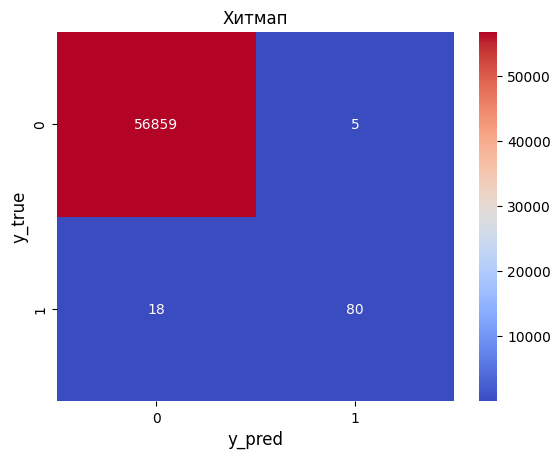

In [ ]:
heatmap = sns.heatmap(
    svod.iloc[0]['conf_ matr'], annot=True,fmt='d', cmap='coolwarm')

plt.title('Хитмап')
plt.xlabel('y_pred', fontsize=12)
plt.ylabel('y_true', fontsize=12)
plt.show()

In [ ]:
dfe=X_test.copy()
y_prede=rf.predict(X_test)
y_pred_probae=rf.predict_proba(X_test)[:, 1]
dfe['y_true']=y_test
dfe['y_pred'] = y_prede
dfe['right']=(dfe['y_true']==dfe['y_pred'])

print(dfe.head())

            Time        V1        V2        V3        V4        V5        V6  \
263020  1.387182 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439   
11378  -1.580138 -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536   
147283 -0.138120 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246   
219439  0.986536  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935   
36939  -1.182272  1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384   

              V7        V8        V9  ...       V23       V24       V25  \
263020  1.885879 -0.614233  0.311652  ... -0.224327  0.707899 -0.135837   
11378  -1.795519 -0.250020  3.073504  ... -0.813272  0.042996 -0.027660   
147283  1.444125 -0.718922  1.874046  ... -0.132058 -1.483996 -0.296011   
219439  0.207792 -0.338140  0.455091  ...  0.331818 -0.067584 -0.283675   
36939   0.854039 -0.475963 -0.629658  ... -0.154631  0.619449  0.818998   

             V26       V27       V28    Amount  y_true  y_pred  righ

Теперь посчитаем средние значения по всем признакам для 4 классов и сравним, где они больше всего отличаются, чтобы выяснить какие-то паттерны (Я сравнила абсолютно для начала, но так как признаки имеют разные масштабы я в итоге и относительную разницу посчитала для tp/fn и fp/tn по каждому признаку)

In [ ]:
mean_tp=dfe[(dfe['right']==1) & (dfe['y_true']==1)].mean()
mean_tn=dfe[(dfe['right']==1) & (dfe['y_true']==0)].mean()
mean_fp=dfe[(dfe['right']==0) & (dfe['y_true']==0)].mean()
mean_fn=dfe[(dfe['right']==0) & (dfe['y_true']==1)].mean()

data_means = pd.DataFrame({
    'TP': mean_tp,
    'TN': mean_tn,
    'FP': mean_fp,
    'FN': mean_fn
})
data_means2=data_means.copy()

data_means['pos_diff(tp\fn)'] = data_means['TP'] - data_means['FN']
data_means['neg_diff(tn\fp)'] = data_means['TN'] - data_means['FP']

data_means2['pos_diff_rel'] = ((data_means2['TP'] - data_means2['FN']) / data_means2['FN'].abs()) * 100
data_means2['neg_diff_rel'] = ((data_means2['TN'] - data_means2['FP']) / data_means2['FP'].abs()) * 100


print('TP/FN abs: ','\n', data_means.sort_values('pos_diff(tp\fn)', ascending=False).head(5), '\n')
print('FP/TN abs: ','\n', data_means.sort_values('neg_diff(tn\fp)', ascending=False).head(5))

print('TP/FN rel: ','\n', data_means2.sort_values('pos_diff_rel', ascending=False, key=abs).head(7), '\n')
print('FP/TN rel: ','\n', data_means2.sort_values('neg_diff_rel', ascending=False, key=abs).head(7))

TP/FN abs:  
            TP        TN        FP        FN  pos_diff(tpn)  neg_diff(tnp)
V11  4.583408 -0.003968  3.607824  1.127628        3.455780       -3.611792
V2   4.380181 -0.005067  5.757542  1.029171        3.351010       -5.762609
V4   4.803369 -0.007793  4.509877  2.265381        2.537988       -4.517670
V21  1.300138 -0.003403  1.181754 -0.037682        1.337820       -1.185157
V19  1.103194 -0.004131 -0.287020 -0.173418        1.276612        0.282889 

FP/TN abs:  
            TP        TN         FP        FN  pos_diff(tpn)  neg_diff(tnp)
V3  -8.091798  0.014397 -11.178430 -1.560524       -6.531274       11.192827
V1  -5.923291  0.006386 -10.279570 -1.058840       -4.864451       10.285956
V7  -6.865652  0.010190  -7.962093 -0.435517       -6.430135        7.972284
V17 -8.949300  0.011420  -6.277307  0.506154       -9.455454        6.288726
V14 -8.299732  0.013129  -5.520853 -2.308924       -5.990808        5.533982
TP/FN rel:  
               TP        TN        FP  

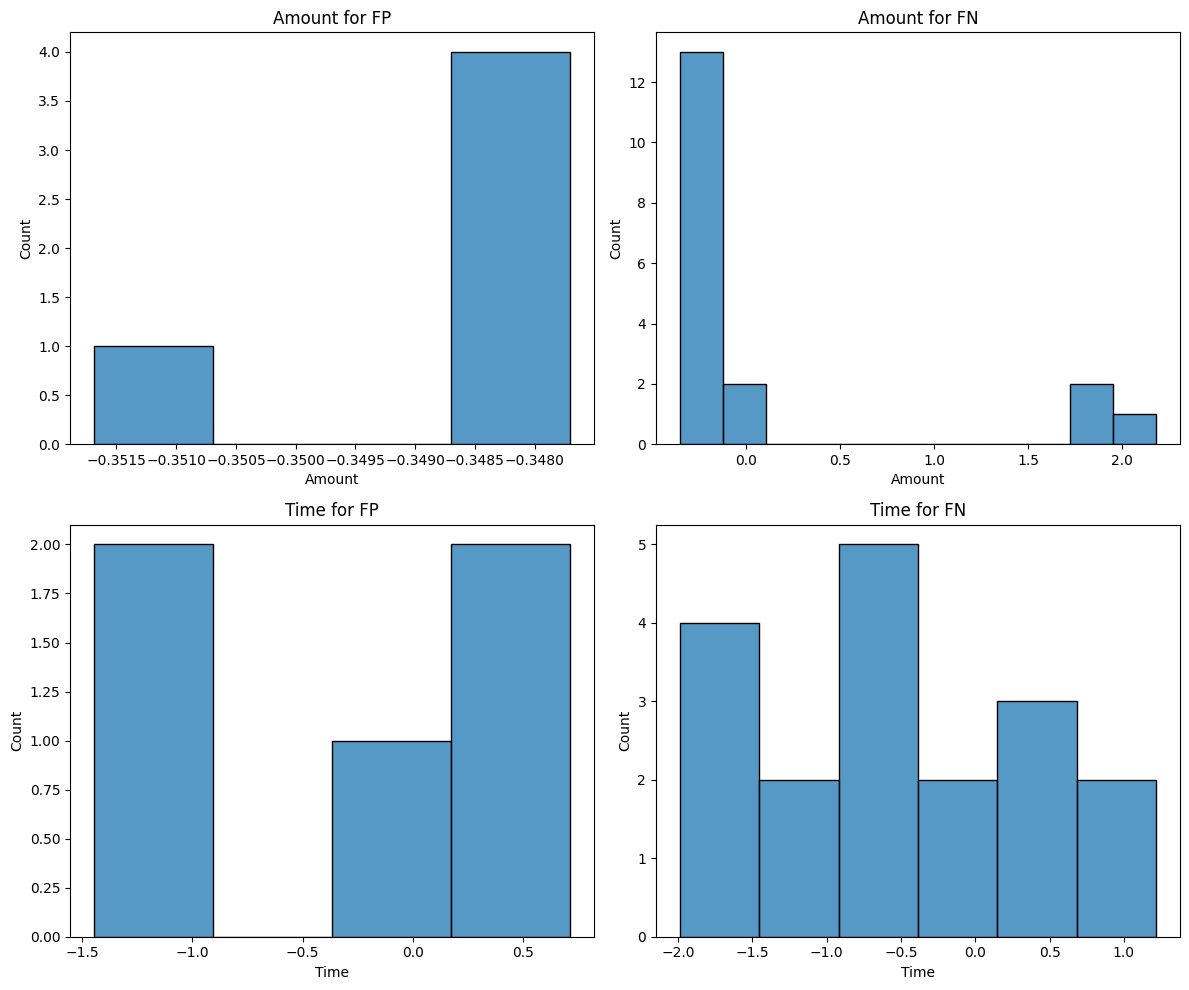

In [ ]:
am_fp=dfe[(dfe['right']==0) & (dfe['y_true']==0)]
am_fn=dfe[(dfe['right']==0) & (dfe['y_true']==1)]

tim_fp=dfe[(dfe['right']==0) & (dfe['y_true']==0)]
tim_fn=dfe[(dfe['right']==0) & (dfe['y_true']==1)]

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.histplot(data=am_fp, x='Amount',label="FP")
plt.title('Amount for FP')

plt.subplot(2, 2, 2)
sns.histplot(data=am_fn, x='Amount',  label="FN")
plt.title('Amount for FN')

plt.subplot(2, 2, 3)
sns.histplot(data=tim_fp, x='Time', label="FP")
plt.title('Time for FP')

plt.subplot(2, 2, 4)
sns.histplot(data=tim_fn, x='Time',  label="FN")
plt.title('Time for FN')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

optmodel=RandomForestClassifier(random_state=42)

param={
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5],
    'class_weight': [
        'balanced',
        {0: 1, 1: 10}
    ],
}

grid_search = GridSearchCV(
    estimator=optmodel,
    param_grid=param,
    cv=3,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print('Лучшие параметры: ', grid_search.best_params_)
print('Лучшиq recall: ', grid_search.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
